performance without pca
accuracy: 1.0000, precision: 1.0000, recall: 1.0000


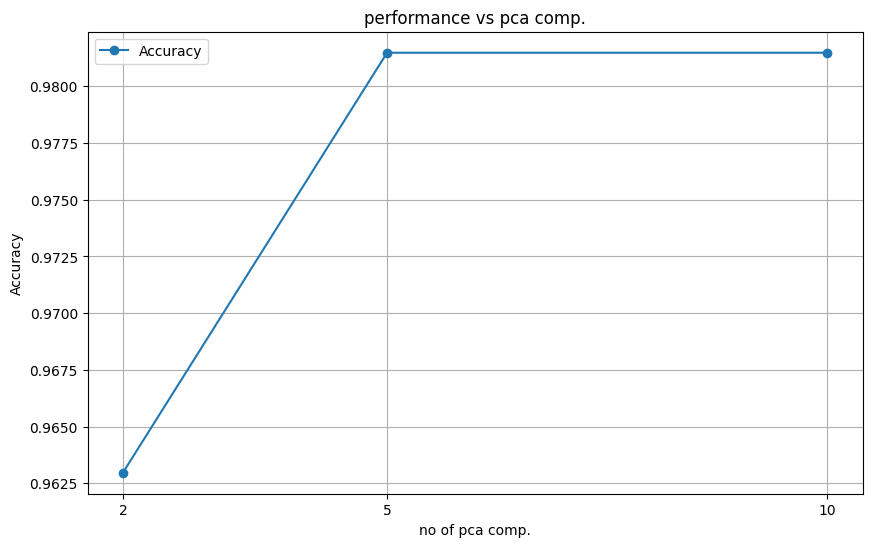

pca components: 2, accuracy: 0.9630, precision: 0.9662, recall: 0.9630
pca components: 5, accuracy: 0.9815, precision: 0.9824, recall: 0.9815
pca components: 10, accuracy: 0.9815, precision: 0.9827, recall: 0.9815


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

d=load_wine()
X=d.data
y=d.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

mdl=LogisticRegression(max_iter=10000)
mdl.fit(X_train,y_train)
y_pred=mdl.predict(X_test)

acc_baseline=accuracy_score(y_test,y_pred)
prec_baseline=precision_score(y_test,y_pred,average='weighted')
rec_baseline=recall_score(y_test,y_pred,average='weighted')

print("performance without pca")
print(f"accuracy: {acc_baseline:.4f}, precision: {prec_baseline:.4f}, recall: {rec_baseline:.4f}")

comps=[2,5,10]
res=[]

for c in comps:
    sc=StandardScaler()
    X_train_std=sc.fit_transform(X_train)
    X_test_std=sc.transform(X_test)

    pca=PCA(n_components=c)
    X_train_pca=pca.fit_transform(X_train_std)
    X_test_pca=pca.transform(X_test_std)

    mdl.fit(X_train_pca,y_train)
    y_pred_pca=mdl.predict(X_test_pca)

    acc=accuracy_score(y_test,y_pred_pca)
    prec=precision_score(y_test,y_pred_pca,average='weighted')
    rec=recall_score(y_test,y_pred_pca,average='weighted')

    res.append((c,acc,prec,rec))

res_df=pd.DataFrame(res,columns=['Components','Accuracy','Precision','Recall'])

plt.figure(figsize=(10,6))
plt.plot(res_df['Components'],res_df['Accuracy'],marker='o',label='Accuracy')
plt.title('performance vs pca comp.')
plt.xlabel('no of pca comp.')
plt.ylabel('Accuracy')
plt.xticks(res_df['Components'])
plt.grid()
plt.legend()
plt.show()

for r in res:
    print(f"pca components: {r[0]}, accuracy: {r[1]:.4f}, precision: {r[2]:.4f}, recall: {r[3]:.4f}")
